In [1]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,SimpleRNN,LSTM,GRU,Bidirectional




import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("review.csv")
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


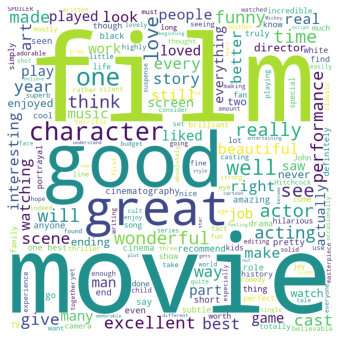

In [3]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["sentiment"]==1]["review"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

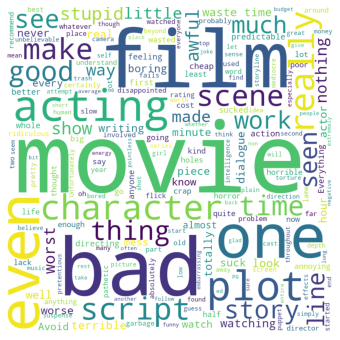

In [4]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["sentiment"]==0]["review"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [5]:
# feature and target
X = df["review"]
y = df["sentiment"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
# machine learning approach
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [7]:
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [8]:
tf = TfidfVectorizer(stop_words="english")
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [9]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_cv,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
y_pred = dt1.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       151
           1       0.71      0.70      0.71       149

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



In [11]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_tf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_pred = dt2.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       151
           1       0.65      0.70      0.67       149

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.66      0.66      0.66       300



In [13]:
# deep learning approach
# Tokenization

tok = Tokenizer()
tok.fit_on_texts(X_train)

In [14]:
# vocabulary
tok.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'it',
 8: 'i',
 9: 'to',
 10: 'in',
 11: 'was',
 12: 'movie',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'with',
 17: 'as',
 18: 'but',
 19: 'are',
 20: 'on',
 21: 'not',
 22: "it's",
 23: 'just',
 24: 'one',
 25: 'you',
 26: 'bad',
 27: 'an',
 28: 'all',
 29: 'so',
 30: 'about',
 31: 'at',
 32: 'very',
 33: 'there',
 34: 'like',
 35: 'good',
 36: 'by',
 37: 'from',
 38: 'have',
 39: 'time',
 40: 'he',
 41: 'out',
 42: 'even',
 43: 'acting',
 44: 'has',
 45: 'his',
 46: 'be',
 47: 'were',
 48: 'well',
 49: 'if',
 50: 'great',
 51: 'who',
 52: 'characters',
 53: 'how',
 54: 'more',
 55: 'my',
 56: 'or',
 57: 'really',
 58: 'see',
 59: 'when',
 60: 'some',
 61: 'than',
 62: 'no',
 63: 'best',
 64: 'plot',
 65: 'made',
 66: 'story',
 67: 'movies',
 68: 'character',
 69: "didn't",
 70: 'most',
 71: 'scenes',
 72: 'wonderful',
 73: 'its',
 74: 'better',
 75: "don't",
 76: '10',
 77: 'me',
 78: 'ever',
 79: 'they',
 80: 'what

In [15]:
vocab_len = len(tok.index_word)
vocab_len

2486

In [16]:
# text to sequence

train_sequence = tok.texts_to_sequences(X_train)

In [17]:
# document length

doc_len=[]
for doc in train_sequence:
    doc_len.append(len(doc))    

In [18]:
max(doc_len)

69

In [19]:
np.quantile(doc_len,0.99)

45.0

In [20]:
max_len = 45

In [21]:
# padding

train_matrix = sequence.pad_sequences(train_sequence,maxlen=max_len)

In [22]:
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]], dtype=int32)

In [23]:
# Test data preprocessing

test_sequence = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_len)

In [24]:
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]], dtype=int32)

In [25]:
## Neural Network


model = Sequential()
model.add(Embedding(vocab_len+1,70,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [28]:
model.fit(train_matrix,y_train,epochs=23,batch_size=64)

Epoch 1/23
11/11 [==============================] - 1s 17ms/step - loss: 0.6999
Epoch 2/23
11/11 [==============================] - 0s 16ms/step - loss: 0.6834
Epoch 3/23
11/11 [==============================] - 0s 17ms/step - loss: 0.6378
Epoch 4/23
11/11 [==============================] - 0s 17ms/step - loss: 0.4444
Epoch 5/23
11/11 [==============================] - 0s 16ms/step - loss: 0.1348
Epoch 6/23
11/11 [==============================] - 0s 16ms/step - loss: 0.0253
Epoch 7/23
11/11 [==============================] - 0s 16ms/step - loss: 0.0052
Epoch 8/23
11/11 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 9/23
11/11 [==============================] - 0s 16ms/step - loss: 7.9630e-04
Epoch 10/23
11/11 [==============================] - 0s 16ms/step - loss: 5.6621e-04
Epoch 11/23
11/11 [==============================] - 0s 16ms/step - loss: 4.2888e-04
Epoch 12/23
11/11 [==============================] - 0s 17ms/step - loss: 3.4895e-04
Epoch 13/23
11/11 [==

In [29]:
y_pred = model.predict(test_matrix)

In [30]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       151
           1       0.71      0.60      0.65       149

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



In [32]:
# USING RNN
# using bidirectional also
# multiple RNN
model = Sequential()
model.add(Embedding(vocab_len+1,64,input_length=max_len,mask_zero=True))
model.add(Bidirectional(SimpleRNN(64,return_sequences = True)))
model.add(Bidirectional(SimpleRNN(64,return_sequences = True)))
model.add(Bidirectional(SimpleRNN(64)))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [34]:
model.fit(train_matrix,y_train,epochs=25,batch_size=64)

Epoch 1/25
11/11 [==============================] - 8s 150ms/step - loss: 0.7303
Epoch 2/25
11/11 [==============================] - 2s 151ms/step - loss: 0.3661
Epoch 3/25
11/11 [==============================] - 2s 156ms/step - loss: 0.1123
Epoch 4/25
11/11 [==============================] - 2s 151ms/step - loss: 0.0296
Epoch 5/25
11/11 [==============================] - 2s 152ms/step - loss: 0.0110
Epoch 6/25
11/11 [==============================] - 2s 157ms/step - loss: 0.0058
Epoch 7/25
11/11 [==============================] - 2s 145ms/step - loss: 0.0036
Epoch 8/25
11/11 [==============================] - 2s 149ms/step - loss: 0.0026
Epoch 9/25
11/11 [==============================] - 2s 151ms/step - loss: 0.0020
Epoch 10/25
11/11 [==============================] - 2s 148ms/step - loss: 0.0016
Epoch 11/25
11/11 [==============================] - 2s 149ms/step - loss: 0.0013
Epoch 12/25
11/11 [==============================] - 2s 148ms/step - loss: 0.0011
Epoch 13/25
11/11 [======

In [35]:
y_pred = model.predict(test_matrix)

In [36]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       151
           1       0.61      0.59      0.60       149

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



In [79]:
model = Sequential()
model.add(Embedding(vocab_len+1,64,input_length=max_len,mask_zero=True))
model.add(Bidirectional(LSTM(max_len , return_sequences= True)))
model.add(Bidirectional(LSTM(max_len , return_sequences= True)))
model.add(Bidirectional(LSTM(max_len)))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [80]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [81]:
model.fit(train_matrix,y_train,epochs=25,batch_size=64)

Epoch 1/25
11/11 [==============================] - 25s 238ms/step - loss: 0.6943
Epoch 2/25
11/11 [==============================] - 3s 241ms/step - loss: 0.6777
Epoch 3/25
11/11 [==============================] - 3s 234ms/step - loss: 0.4340
Epoch 4/25
11/11 [==============================] - 3s 234ms/step - loss: 0.1705
Epoch 5/25
11/11 [==============================] - 3s 231ms/step - loss: 0.1031
Epoch 6/25
11/11 [==============================] - 3s 236ms/step - loss: 0.0748
Epoch 7/25
11/11 [==============================] - 3s 232ms/step - loss: 0.0456
Epoch 8/25
11/11 [==============================] - 3s 233ms/step - loss: 0.0280
Epoch 9/25
11/11 [==============================] - 3s 231ms/step - loss: 0.0217
Epoch 10/25
11/11 [==============================] - 3s 235ms/step - loss: 0.0178
Epoch 11/25
11/11 [==============================] - 3s 236ms/step - loss: 0.0154
Epoch 12/25
11/11 [==============================] - 3s 241ms/step - loss: 0.0135
Epoch 13/25
11/11 [=====

In [82]:
y_pred = model.predict(test_matrix)

In [83]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       151
           1       0.73      0.74      0.74       149

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [112]:
model = Sequential()
model.add(Embedding(vocab_len+1,64,input_length=max_len,mask_zero=True))
model.add(GRU(max_len))
model.add(Dense(128,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [113]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [116]:
model.fit(train_matrix,y_train,epochs=25,batch_size=64)

Epoch 1/25
11/11 [==============================] - 0s 44ms/step - loss: 2.5269e-04
Epoch 2/25
11/11 [==============================] - 0s 44ms/step - loss: 2.3133e-04
Epoch 3/25
11/11 [==============================] - 0s 40ms/step - loss: 2.1574e-04
Epoch 4/25
11/11 [==============================] - 0s 41ms/step - loss: 2.0014e-04
Epoch 5/25
11/11 [==============================] - 0s 40ms/step - loss: 1.8529e-04
Epoch 6/25
11/11 [==============================] - 0s 42ms/step - loss: 1.7446e-04
Epoch 7/25
11/11 [==============================] - 0s 40ms/step - loss: 1.6159e-04
Epoch 8/25
11/11 [==============================] - 0s 42ms/step - loss: 1.5239e-04
Epoch 9/25
11/11 [==============================] - 0s 41ms/step - loss: 1.4276e-04
Epoch 10/25
11/11 [==============================] - 0s 41ms/step - loss: 1.3432e-04
Epoch 11/25
11/11 [==============================] - 0s 40ms/step - loss: 1.2724e-04
Epoch 12/25
11/11 [==============================] - 0s 41ms/step - loss: 

In [117]:
y_pred = model.predict(test_matrix)

In [118]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       151
           1       0.77      0.77      0.77       149

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300

